In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [68]:
df['BMI'].value_counts()

,count
BMI,
32.0,13
31.6,12
31.2,12
0.0,11
32.4,10
...,...
49.6,1
24.1,1
41.2,1


In [69]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [70]:
df = df.dropna()
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [71]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["encoded_BMI"] = encoder.fit_transform(df["BMI"])

In [72]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,encoded_BMI
0,6,148,72,35,0,33.6,0.627,50,1,123
1,1,85,66,29,0,26.6,0.351,31,0,62
2,8,183,64,0,0,23.3,0.672,32,1,30
3,1,89,66,23,94,28.1,0.167,21,0,77
4,0,137,40,35,168,43.1,2.288,33,1,209
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,118
764,2,122,70,27,0,36.8,0.340,27,0,155
765,5,121,72,23,112,26.2,0.245,30,0,58
766,1,126,60,0,0,30.1,0.349,47,1,95


In [73]:
df["encoded_BMI"].value_counts()

,count
encoded_BMI,
109,13
107,12
105,12
0,11
113,10
...,...
238,1
38,1
196,1


In [74]:
X = df.drop(columns=['BMI', 'Outcome', 'encoded_BMI'])
y = df['encoded_BMI']

In [75]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
764,2,122,70,27,0,0.340,27
765,5,121,72,23,112,0.245,30
766,1,126,60,0,0,0.349,47


In [76]:
y

,encoded_BMI
0,123
1,62
2,30
3,77
4,209
...,...
763,118
764,155
765,58
766,95


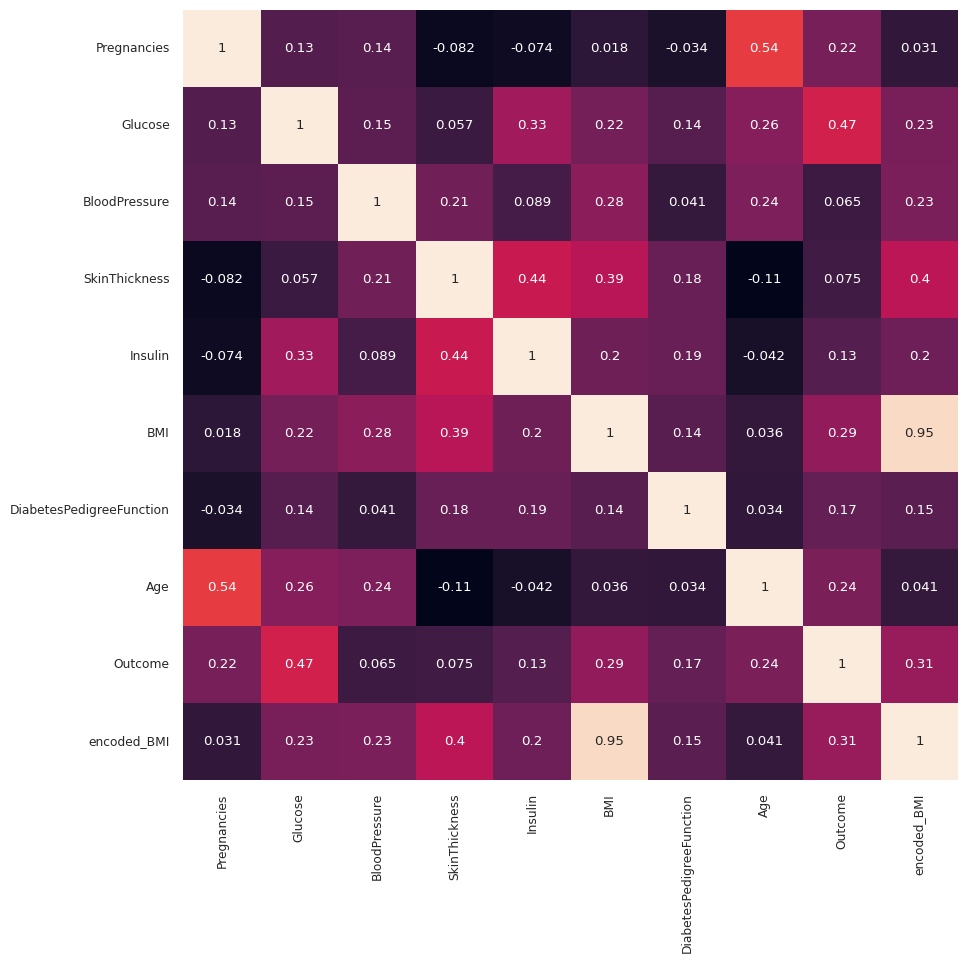

In [77]:
import seaborn as sns

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [78]:
X = X.values
Y = pd.get_dummies(y).values

In [79]:
X_train,X_test, y_train,y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=42)

In [80]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614, 248), (154, 248))

In [82]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'mse',
    metrics = ['mse'])

In [84]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mse:

In [87]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


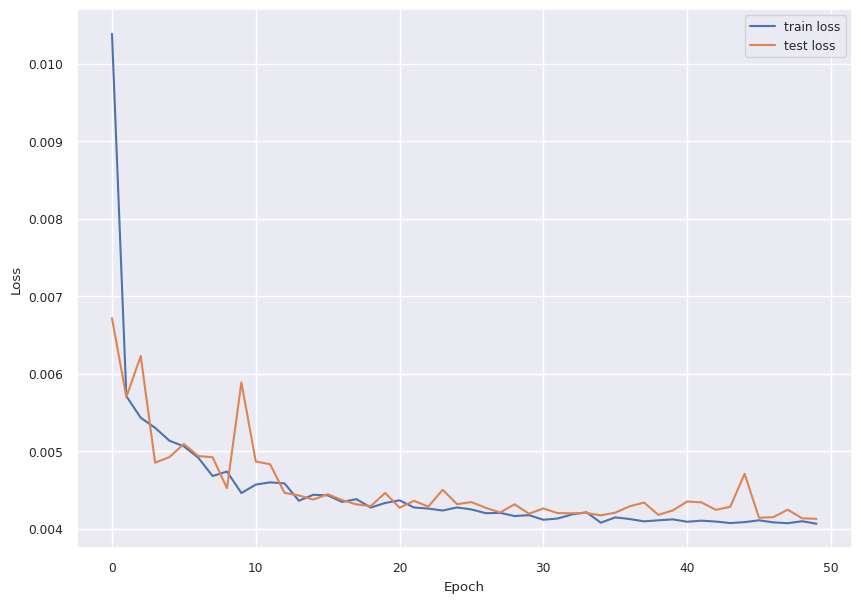

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(range(50), history.history['loss'], label='train loss')
plt.plot(range(50), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [89]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mse: 0.0042 


[0.004206627141684294, 0.004206627141684294]